## Business Problem

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load_DataSet

In [ ]:
path = pd.read_csv("/content/student_info.csv")
path

,Study_Hours,Student_Marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
194,7.53,81.67
195,8.56,84.68
196,8.94,86.75
197,6.60,78.05


In [ ]:
path.head()

,Study_Hours,Student_Marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [ ]:
path.tail()

,Study_Hours,Student_Marks
194,7.53,81.67
195,8.56,84.68
196,8.94,86.75
197,6.60,78.05
198,8.35,83.50


In [ ]:
path.describe()

,Study_Hours,Student_Marks
count,198.000000,199.000000
mean,6.975051,77.942764
std,1.258245,4.936469
min,4.990000,68.570000
25%,5.752500,73.370000
50%,7.055000,77.770000
75%,8.077500,82.340000
max,8.990000,86.990000


In [ ]:
path.shape

(199, 2)

## Visualize and insight from the data

In [ ]:
path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Study_Hours    198 non-null    float64
 1   Student_Marks  199 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
path.describe()

,Study_Hours,Student_Marks
count,198.000000,199.000000
mean,6.975051,77.942764
std,1.258245,4.936469
min,4.990000,68.570000
25%,5.752500,73.370000
50%,7.055000,77.770000
75%,8.077500,82.340000
max,8.990000,86.990000


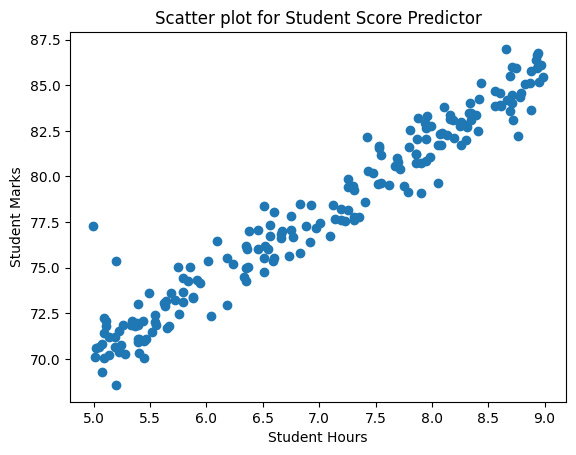

In [ ]:
plt.scatter( x = path.Study_Hours , y =path.Student_Marks)
plt.xlabel("Student Hours")
plt.ylabel("Student Marks")
plt.title("Scatter plot for Student Score Predictor")
plt.show()

## prepare data for machine learning

In [ ]:
# data cleaning

In [ ]:
path.isnull()

,Study_Hours,Student_Marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
194,False,False
195,False,False
196,False,False
197,False,False


In [ ]:
path.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Study_Hours  Student_Marks
0          False          False
1          False          False
2           True          False
3          False          False
4          False          False
..           ...            ...
194        False          False
195        False          False
196        False          False
197        False          False
198        False          False

[199 rows x 2 columns]>

In [ ]:
path.isnull().sum()

Study_Hours      1
Student_Marks    0
dtype: int64

In [ ]:
path.mean()

Study_Hours       6.975051
Student_Marks    77.942764
dtype: float64

In [ ]:
path2 = path.fillna(path.mean())

In [ ]:
path2

,Study_Hours,Student_Marks
0,6.830000,78.50
1,6.560000,76.74
2,6.975051,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
194,7.530000,81.67
195,8.560000,84.68
196,8.940000,86.75
197,6.600000,78.05


In [ ]:
path2.isnull().sum()

Study_Hours      0
Student_Marks    0
dtype: int64

In [ ]:
path2.head()

,Study_Hours,Student_Marks
0,6.830000,78.50
1,6.560000,76.74
2,6.975051,78.68
3,5.670000,71.82
4,8.670000,84.19


In [ ]:
#split data der

In [ ]:
X = path2.drop("Student_Marks" , axis= "columns")
y = path2.drop("Study_Hours" , axis= "columns")

In [ ]:
print ("Shape of X =" , X.shape)
print("shape of y = ", y.shape)

Shape of X = (199, 1)
shape of y =  (199, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 50)
print ("Shape of X =" , X_train.shape)
print("shape of y = ", y_train.shape)
print("Shape of X =" , X_test.shape)
print("shape of y = ",y_test.shape)


Shape of X = (159, 1)
shape of y =  (159, 1)
Shape of X = (40, 1)
shape of y =  (40, 1)


## select model and train it

In [ ]:
#y = m*x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train , y_train )

LinearRegression()

In [ ]:
lr.coef_

array([[3.74523425]])

In [ ]:
lr.intercept_

array([51.7489894])

In [ ]:
# how math work in Machine learningm
m = 3.74
c = 51.74
y = m * 4+c
y

66.7

In [ ]:
#machine learning model direct learn this
lr.predict([[4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[66.72992641]])

In [ ]:
lr.predict([[4]])[0][0].round(2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.73

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([[83.02169542],
       [72.16051608],
       [79.08919946],
       [79.53862757],
       [84.29507507],
       [85.23138363],
       [81.52360172],
       [71.18675518],
       [78.93939009],
       [71.52382626],
       [80.77455487],
       [81.52360172],
       [80.58729316],
       [73.65860979],
       [81.97302983],
       [81.56105406],
       [76.69224953],
       [71.86089734],
       [84.51978913],
       [84.6695985 ],
       [85.00666958],
       [75.53122691],
       [71.93580203],
       [74.25784727],
       [85.19393129],
       [70.99949347],
       [76.69224953],
       [78.3401526 ],
       [80.28767442],
       [71.29911221],
       [82.1228392 ],
       [84.36997976],
       [81.48614938],
       [79.57607991],
       [74.37020429],
       [72.49758717],
       [82.01048217],
       [77.02932062],
       [84.81940787],
       [71.89834969]])

In [ ]:
pd.DataFrame(np.c_[X_test, y_test, y_pred ] , columns = ["study_hours" , " student mark original ", "student mark predcted"])

,study_hours,student mark original,student mark predcted
0,8.35,83.50,83.021695
1,5.45,70.96,72.160516
2,7.30,79.49,79.089199
3,7.42,82.18,79.538628
4,8.69,85.48,84.295075
5,8.94,86.75,85.231384
6,7.95,82.68,81.523602
7,5.19,70.66,71.186755
8,7.26,79.87,78.939390
9,5.28,70.27,71.523826


## Fine tune your model

In [ ]:
lr.score(X_test , y_test)   # here to cheak the accuracy

0.9591026044885573

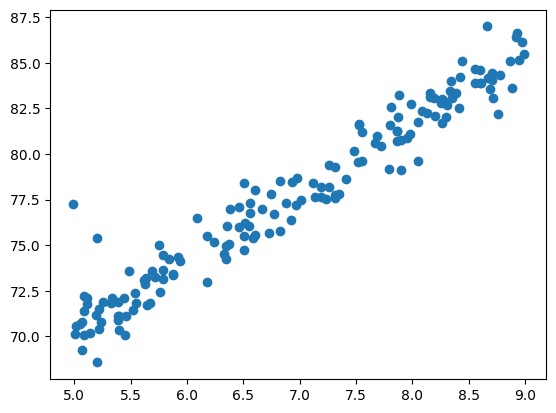

In [ ]:
plt.scatter(X_train , y_train)

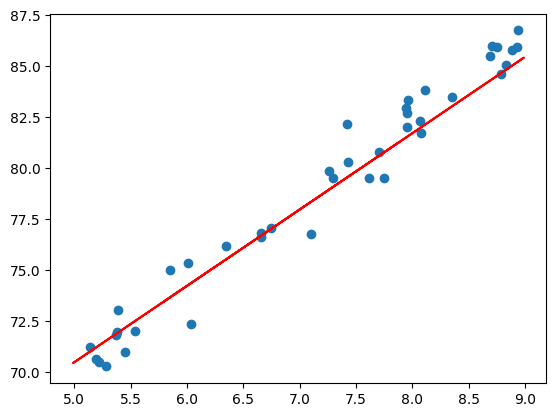

In [ ]:
plt.scatter(X_test , y_test)
plt.plot(X_train , lr.predict(X_train) , color="r")

## present your soloution

## save model

In [ ]:
import joblib
joblib.dump(lr , "sudent_mark_pred_model.pkl")

['sudent_mark_pred_model.pkl']

In [ ]:
model = joblib.load("sudent_mark_pred_model.pkl")
model.predict([[5]])[0][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.47516066957452